# Tuning Support vector machine in python
Qiudong Deng
qddeng@gmail.com

In [1]:
#set wd

import os
os.getcwd()
os.chdir('E:/2016 spring course/msa 8150/final project proposal')
os.getcwd()

# import modules
import pandas as pd
import numpy as np
import subprocess

#read data in-1
#data from https://archive.ics.uci.edu/ml/machine-learning-databases/
df = pd.read_csv("adult with col names with na.csv", index_col=0)
#list(df)


ncol = len(df.axes[1])
nrow=len(df.axes[0])
print("%s x %s" % (nrow, ncol)) #check dimension 
print (df.dtypes) #check data types

# count freq
#df.groupby('y').count()

#convert object col to int64 and rename-2
n = ncol
for i in range(0,n):
       if (df.iloc[:,i].dtype==object):
        A= df.iloc[:,i].unique()
        map_to_int = {name: n for n, name in enumerate(A)}
        df.iloc[:,i] = df.iloc[:,i].replace(map_to_int)
print (df.dtypes)


#first n-1col as features, and the last one as target
df1=df.iloc[:,0:n]
features = list(df1.columns[:(n-1)])
print("* features:", features, sep="\n")
df1.rename(columns={'y':'Target'}, inplace=True)
#list(df1)
#df1

#split data to train and test-3
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df1, test_size = 0.5)

y = train["Target"]
X = train[features]

from sklearn import svm
clf = svm.SVC(kernel='rbf',probability=True)
clf.fit(X, y)  

from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted_svm1 = clf.predict(X1)
print(metrics.classification_report(expected, predicted_svm1))
print(metrics.confusion_matrix(expected, predicted_svm1))

32561 x 15
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
y                 object
dtype: object
age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
y                 int64
dtype: object
* features:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
             precision

In [2]:
# svm roc 
probas1_ = clf.fit(X, y).predict_proba(X1)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate_svm1, true_positive_rate_svm1, thresholds = roc_curve(expected, probas1_[:, 1])
roc_auc_svm1 = auc(false_positive_rate_svm1, true_positive_rate_svm1)
roc_auc_svm1

0.54919987257230629

In [3]:
# standarlized data 

import os
os.getcwd()
os.chdir('E:/2016 spring course/msa 8150/final project proposal')
os.getcwd()

# import modules
import pandas as pd
import numpy as np
import subprocess

#read data in-1
#data from https://archive.ics.uci.edu/ml/machine-learning-databases/
df = pd.read_csv("adult with col names with na.csv", index_col=0)
#list(df)


ncol = len(df.axes[1])
nrow=len(df.axes[0])
print("%s x %s" % (nrow, ncol)) #check dimension 
print (df.dtypes) #check data types

# count freq
#df.groupby('y').count()

#http://scikit-learn.org/stable/modules/preprocessing.html
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#standard to mean to 0 and var 1

from sklearn import preprocessing
import numpy as np
n = ncol

for i in range(0,n):
       if (df.iloc[:,i].dtype== np.int64 ):
            df.iloc[:,i]= preprocessing.scale(df.iloc[:,i])
            
            
            
#convert object col to int64 and rename-2
n = ncol
for i in range(0,n):
       if (df.iloc[:,i].dtype==object):
        A= df.iloc[:,i].unique()
        map_to_int = {name: n for n, name in enumerate(A)}
        df.iloc[:,i] = df.iloc[:,i].replace(map_to_int)
print (df.dtypes)
#first n-1col as features, and the last one as target
n = ncol
df1=df.iloc[:,0:n]
features = list(df1.columns[:(n-1)])
print("* features:", features, sep="\n")
df1.rename(columns={'y':'Target'}, inplace=True)
#list(df1)
#df1

#split data to train and test-3
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df1, test_size = 0.5)

#using train set to construct model 
y = train["Target"]
X = train[features] 

#http://scikit-learn.org/stable/modules/svm.html#svm-kernels
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

#using rbf kernel
from sklearn import svm
clf = svm.SVC(kernel='rbf',probability=True)
clf.fit(X, y)  

from sklearn import metrics   
expected = test["Target"]
X2 = test[features]
predicted_svm2 = clf.predict(X2)
print(metrics.classification_report(expected, predicted_svm2))
print(metrics.confusion_matrix(expected, predicted_svm2))

32561 x 15
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
y                 object
dtype: object


C:\Users\qddeng\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\qddeng\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\qddeng\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\qddeng\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\qddeng\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtyp

age               float64
workclass           int64
fnlwgt            float64
education           int64
education-num     float64
marital-status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country      int64
y                   int64
dtype: object
* features:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
             precision    recall  f1-score   support

          0       0.86      0.94      0.90     12423
          1       0.74      0.52      0.61      3858

avg / total       0.84      0.84      0.83     16281

[[11730   693]
 [ 1840  2018]]


In [4]:
# svm roc 
probas2_ = clf.fit(X, y).predict_proba(X2)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate_svm2, true_positive_rate_svm2, thresholds = roc_curve(expected,probas2_[:,1])
roc_auc_svm2 = auc(false_positive_rate_svm2, true_positive_rate_svm2)
roc_auc_svm2


0.87935660861158749

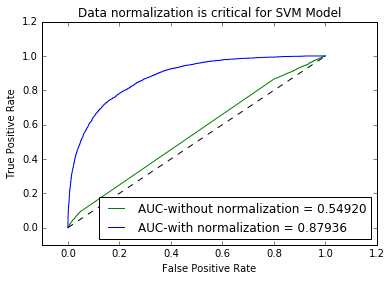

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Data normalization is critical for SVM Model')
plt.plot(false_positive_rate_svm1, true_positive_rate_svm1, 'g',
label='AUC-without normalization = %0.5f'% roc_auc_svm1)

plt.plot(false_positive_rate_svm2, true_positive_rate_svm2, 'b',
label='AUC-with normalization = %0.5f'% roc_auc_svm2)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [6]:
#linear svc
from sklearn import svm
clf = svm.SVC(kernel='linear',probability=True)
clf.fit(X,y)  
from sklearn import metrics   
expected = test["Target"]
X3 = test[features]
predicted_svm3 = clf.predict(X3)
print(metrics.classification_report(expected, predicted_svm3))
print(metrics.confusion_matrix(expected, predicted_svm3))

             precision    recall  f1-score   support

          0       0.82      0.98      0.89     12423
          1       0.83      0.30      0.44      3858

avg / total       0.82      0.82      0.79     16281

[[12176   247]
 [ 2686  1172]]


In [7]:
# svm roc 
probas3_ = clf.fit(X, y).predict_proba(X3)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate_svm_linear, true_positive_rate_svm_linear, thresholds = roc_curve(expected,probas3_[:,1])
roc_auc_svm_linear = auc(false_positive_rate_svm_linear, true_positive_rate_svm_linear)
roc_auc_svm_linear

0.84838024731047246

In [8]:
#using Polynomial_kernel
#https://en.wikipedia.org/wiki/Kernel_method
from sklearn import svm
clf = svm.SVC(kernel='poly',probability=True)
clf.fit(X, y)  

from sklearn import metrics   
expected = test["Target"]
X3 = test[features]
predicted_svm3 = clf.predict(X3)
print(metrics.classification_report(expected, predicted_svm3))
print(metrics.confusion_matrix(expected, predicted_svm3))

             precision    recall  f1-score   support

          0       0.84      0.97      0.90     12423
          1       0.78      0.41      0.54      3858

avg / total       0.83      0.83      0.81     16281

[[11990   433]
 [ 2282  1576]]


In [9]:
# svm pl roc 
probas3_ = clf.fit(X, y).predict_proba(X3)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


false_positive_rate_svm3, true_positive_rate_svm3, thresholds = roc_curve(expected,probas3_[:,1])
roc_auc_svm3 = auc(false_positive_rate_svm2, true_positive_rate_svm2)
roc_auc_svm3

0.87935660861158749

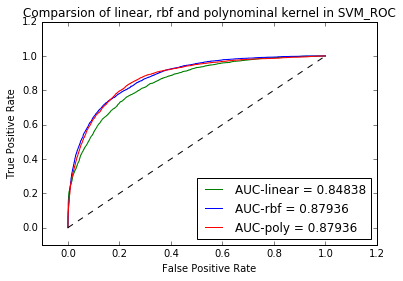

In [10]:
import matplotlib.pyplot as plt

plt.title('Comparsion of linear, rbf and polynominal kernel in SVM_ROC')
plt.plot(false_positive_rate_svm_linear, true_positive_rate_svm_linear, 'g',
label='AUC-linear = %0.5f'% roc_auc_svm_linear)
#rbf kernel
plt.plot(false_positive_rate_svm2, true_positive_rate_svm2, 'b',
label='AUC-rbf = %0.5f'% roc_auc_svm2)
#poly kernel
plt.plot(false_positive_rate_svm3, true_positive_rate_svm3, 'r',
label='AUC-poly = %0.5f'% roc_auc_svm3)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
# grid search
from __future__ import print_function

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}

Grid scores on development set:

0.820 (+/-0.009) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.818 (+/-0.001) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.0001}
0.816 (+/-0.016) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.001}
0.822 (+/-0.011) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.0001}
0.822 (+/-0.023) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.001}
0.812 (+/-0.013) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.0001}
0.830 (+/-0.016) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}
0.812 (+/-0.015) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.0001}
0.805 (+/-0.017) for {'C': 1, 'kernel': 'linear'}
0.803 (+/-0.018) for {'C': 10, 'kernel': 'linear'}
0.804 (+/-0.016) for {'C': 100, 'kernel': 'linear'}
0.803 (+/-0.016) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The mode

In [12]:
#below use the best parameters found in grid search 
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma=0.001,C=1000,probability=True)
clf.fit(X, y)  

from sklearn import metrics   
expected = test["Target"]
X4 = test[features]
predicted_svm4 = clf.predict(X4)
print(metrics.classification_report(expected, predicted_svm4))
print(metrics.confusion_matrix(expected, predicted_svm4))

             precision    recall  f1-score   support

          0       0.87      0.95      0.91     12423
          1       0.76      0.54      0.63      3858

avg / total       0.84      0.85      0.84     16281

[[11768   655]
 [ 1775  2083]]


In [13]:
probas4_ = clf.fit(X, y).predict_proba(X4)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# svm4 roc 
false_positive_rate_svm4, true_positive_rate_svm4, thresholds = roc_curve(expected,probas4_[:,1])
roc_auc_svm4 = auc(false_positive_rate_svm4, true_positive_rate_svm4)
roc_auc_svm4
            

0.89719133313778965

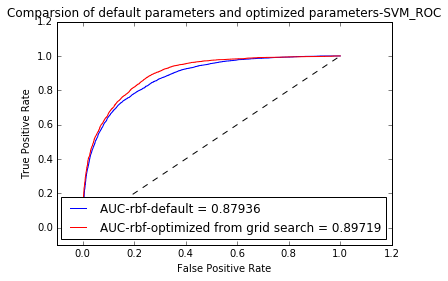

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Comparsion of default parameters and optimized parameters-SVM_ROC')

#rbf kernel
plt.plot(false_positive_rate_svm2, true_positive_rate_svm2, 'b',
label='AUC-rbf-default = %0.5f'% roc_auc_svm2)
#optimized kernel
plt.plot(false_positive_rate_svm4, true_positive_rate_svm4, 'r',
label='AUC-rbf-optimized from grid search = %0.5f'% roc_auc_svm4)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()